# Lab Sheet 2 (COM3502-4502-6502 Speech Processing)

This lab sheet is part of the lecture COM[3502](http://www.dcs.shef.ac.uk/intranet/teaching/public/modules/level3/com3502.html "Open web page for COM3502 module")-[4502](http://www.dcs.shef.ac.uk/intranet/teaching/public/modules/level4/com4502.html "Open web page for COM4502 module")-[6502](http://www.dcs.shef.ac.uk/intranet/teaching/public/modules/msc/com6502.html "Open web page for COM4502 module") Speech Processing at the [University of Sheffield](https://www.sheffield.ac.uk/ "Open web page of The University of Sheffield"), Dept. of [Computer Science](https://www.sheffield.ac.uk/dcs "Open web page of Department of Computer Science, University of Sheffield").

It is probably easiest to open this Jupyter Notebook with [Google Colab](https://colab.research.google.com/notebooks/intro.ipynb#recent=true "Open in Google Colab") since GitHub's Viewer does not show all details correctly. <a href="https://colab.research.google.com/github/sap-shef/SpeechProcesssingLab/blob/main/Lab-Sheets/Lab-Sheet-2.ipynb"><img align="right" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open Notebook in Google Colab" title="Open and Execute the Notebook directly in Google Colaboratory"></a>

Please put questions, comments and correction suggestions in the [Blackboard](https://vle.shef.ac.uk) discussion board or send an email to [s.goetze@sheffield.ac.uk](mailto:s.goetze@sheffield.ac.uk).

In [1]:
# Let's do some necessary and nice-to-have imports
%matplotlib inline
import matplotlib.pyplot as plt  # plotting
import seaborn as sns; sns.set() # styling
import numpy as np               # math

## Generate sine wave

We are already familiar with generating sine signals from last lab sheet. Since we will need a lot of sine signals this time, it makes sense to create a function calculating a sine.

<br>
<div style="border: 2px solid #999; padding: 10px; background: #eee;">
    
**Task 1: A function to create sine waves**
    
Please write a function `get_sine_wave(frequency_hz, length_s, sample_rate_hz)` which returns a sine wave with the given frequency $f$ and duration (in seconds) at the desired sample rate $f_s$.
</div>



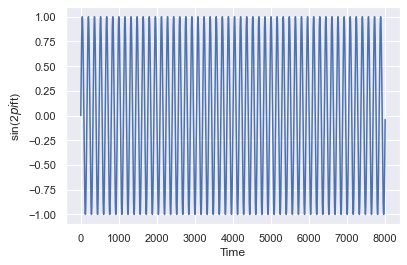

In [51]:
def get_sine_wave(frequency_hz, length_s=1, sample_rate_hz=8000):
    """
    Return a sine wave with given parameters.
    
    Parameters
    ----------
    frequency_hz : float
        frequency $f$ of the sinus to be generated 
    length_s : float, optional
        length of the sine signal to be generated, default: 1 sec.
    sample_rate_hz : float, optional
        sampling frequency $f_s$ in Hz, default: 8000 Hz

    Returns
    -------
    signal
        generated sinus signal
    """
    
    # your code here
    f=frequency_hz
    l=length_s
    fs=sample_rate_hz
    t=np.arange(0,1,1/fs)
    sin1=np.sin(2*np.pi*f*t)
    return sin1
    
sin1=get_sine_wave(50)
plt.plot(sin1)
plt.xlabel('Time')
plt.ylabel('sin(2$pi$ft)')
plt.show()

    #return ... # let the function return the sinus signal

Typical samples rates are 8000 Hz or 16000 Hz for speech signals and 22050 Hz, 44100 Hz or 48000 Hz for music. We will now use a sample rate of **8000 Hz**. Further down in this lab sheet we will play around with sampling frequencies.

Sound signls perceiveable by humans are roughly in the range of 20 Hz to 20 000 Hz (for older persons equcially the theoretical limit of 20 kHz is usually lower). 

The so called [concert pitch](https://en.wikipedia.org/wiki/Concert_pitch "Open Wikipedia for more information on Concert Pitch") is at 440 Hz.
We now want to generate a 2 second sine wave with concert pitch at the sample rate mentioned above and then look at a part of the generated signal to check that it actually resembles a sine wave.

<br>
<div style="border: 2px solid #999; padding: 10px; background: #eee;">
    
**Task 2: Visualise the sine wave**
    
Generate and visualise the a concert pitch signal of 2 seconds, i.e. the sine signal of frequency $f=440$ Hz and listen to it. Plese note, that for visualising (plotting) you might want to only plot the first samples. The initial samples of a vector can be selected by `variable_name[0:number_of_samples]` or shorter by `variable_name[:number_of_samples]`. 
</div>

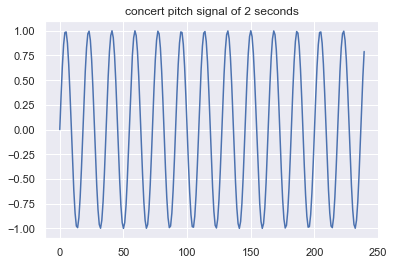

In [52]:
# please complete the following code:

concert_pitch = get_sine_wave(440)

# Look at the first 30 ms (240 / 8000 Hz = 0.03 s) of the generated wave
plt.plot(concert_pitch[:240])

plt.title('concert pitch signal of 2 seconds')
None # This command does nothing but prevents printing the result of previous function call

We can concatenate signals to form a longer signal.
As an example we want to create a new signal with half the concert pitch frequency (which we call `half_concert_pitch`) and then play it 2 times alternating with the concert pitch. `numpy`'s `np.concatenate(...)` might be useful for this task.

<br>
<div style="border: 2px solid #999; padding: 10px; background: #eee;">
    
**Task 3: Concatenate sine waves of different frequency**
    
Generate a second sine signal of same length but with only half the frequency, i.e. 
    
Visualise the generated signal, i.e. the sine signal of frequence $f=220$ Hz. Concetenate the signal blocks alternating to create a signal of 8 seconds. and listen to it.  
</div>

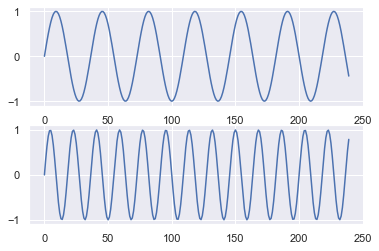

In [57]:
# your code here
half_concert_pitch = get_sine_wave(220)
plt.subplot(211)
plt.plot(half_concert_pitch[:240])
alternation = np.concatenate((concert_pitch,half_concert_pitch),axis=0)
plt.subplot(212)
plt.plot(alternation[:240])
import IPython.display as ipd # for interactive notebook elements 
ipd.Audio(alternation,rate=8000)
# play alternating signal
# ...

Adding together two signals gives a signal where both frequencies can be heard.
The resulting signal does not look like a sine wave anymore but we can still clearly see its periodicity.
The periodicity is so promiment because one frequency is a multiple of the other.
If this is not the case it can take much longer for the signal to repeat its pattern.

<br>
<div style="border: 2px solid #999; padding: 10px; background: #eee;">
    
**Task 4: Superposition**
    
Add, visualise and play a superposition (addition) of two sine signals for which the frequency is close together than in the example before.  
</div>

In [31]:
# your code here
ipd.Audio(alternation,rate=8000)

## Damped sine 


A damped sine can be defined as

\begin{equation}
x(t) = \mathrm{sin}(2 \pi f t) \, \mathrm{e}^{- a t}.
\label{eqn:dampled-sinus}
\tag{1}
\end{equation}


<br>
<div style="border: 2px solid #999; padding: 10px; background: #eee;">
    
**Task 5: Damped sine wave**
    
Create a sine with $f=2.5$ Hz of $1$ second length and plot it. 
    
Create the damped sinus according to \eqref{eqn:dampled-sinus} from the just created sine wave. 
    
Play around with the damping factor $a$.
</div>

Text(0.5, 0, '$t$ in seconds')

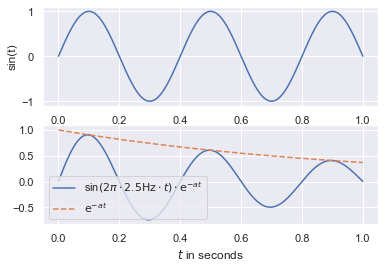

In [54]:
fs=8000
t=np.arange(0,1,1/fs) # crete time vector of 1 second length
f = 2.5               # frequency for sine (2.5 Hz)
a = 1             # daming factor (play around with it and see what happens)

sin  = np.sin(2*np.pi*f*t) # add code here
damp = np.exp(-a*t)
x = sin * damp

plt.subplot(2,1,1);
plt.plot(t,sin)
plt.ylabel('sin(t)') # complete code here

plt.subplot(2,1,2);
plt.plot(t,x, label='sin$(2 \pi \cdot ' + str(f) + ' \mathrm{Hz} \cdot t) \cdot \mathrm{e}^{- a t}$')
plt.plot(t,damp, '--', label='$\mathrm{e}^{- a t}$')
plt.legend()
plt.xlabel('$t$ in seconds') # the ; also suppresses output, try to delete it

## Play a song 

By generating sine waves of different lengths and frequencies with `get_sine_wave` you are now able to play simple songs. 

The picture below shows the relation of musical notes to keys of a keyboard.

<img src="notes-vs-keys.png" alt="Relation between notes and keys of a keyboard." style="width: 500px;"/>

We already learned that each note has a fundamental [frequency](https://pages.mtu.edu/~suits/notefreqs.html), e.g. as in the following table:

| note      | ... |  G3  |  A3  |   B3   |   C4   |   D4   |   E4   |   F4   |   G4   |     A4  |  ...  |
| --------- | --- | ---- | ---- | ------ | ------ | ------ | ------ | ------ | ------ | ------- |  ---- |
| $f$ in Hz | ... | 196  |  220 | 246.94 | 261.63 | 293.66 | 329.63 | 349.23 | 392.00 | **440** |  ...  |

Just FYI (knowledge not necessary to solve the task, but maybe nevertheless of interest for some of you):
* The [note A4](https://en.wikipedia.org/wiki/A_(musical_note)) is our reference point and is defined having a frequency of [440 Hz](https://en.wikipedia.org/wiki/A440_(pitch_standard)) (which is why it is marked by bold font in the table  above)
* one [octave](https://en.wikipedia.org/wiki/Octave), e.g. from C to the next C (or from A to the next A), means doubling the frequency
* In general we can calculate the frequency of a tone by the following equaltion (but it's probaly easier to look it up, e.g. using the link above):
\begin{equation}
f = 440 * 2 ^{(\mathrm{note-position} / 12) + (\mathrm{octave} - 4)}
\end{equation}


<br>
<div style="border: 2px solid #999; padding: 10px; background: #eee;">
    
**Task 6:**
    
Create notes G3, A3, B3, D4, C4 and E4 and concatenate the sounds to create your first song.
</div>


In [58]:
# create basic tones
g = get_sine_wave(196.00)
a = get_sine_wave(220.00)
b = get_sine_wave(246.93)
c = get_sine_wave(261.63)
d = get_sine_wave(293.66)
e = get_sine_wave(329.63)
f = get_sine_wave(349.23)
gh = get_sine_wave(392.00)
ah = get_sine_wave(440.00)
# append together to form tune + chord 
tune = [c,c,gh,gh,ah,ah,gh,gh,f,f,e,e,d,d,c,(c+f+e)]
tune = np.concatenate(tune)
ipd.Audio(tune,rate=8000)
# play-back:
# plot:


<div style="border: 2px solid #999; padding: 10px; background: #eee;">
    
**Task 7:**
    
Repeat Task 6, but this time creating damped tones (remember equation (1)).
</div>


In [62]:
# your code here
def get_damp_wave(frequency_hz, length_s=1, sample_rate_hz=8000):
    fs=8000
    t=np.arange(0,1,1/fs) # crete time vector of 1 second length
    f = frequency_hz               # frequency for sine (2.5 Hz)
    a = 1             # daming factor (play around with it and see what happens)

    sin  = np.sin(2*np.pi*f*t) # add code here
    damp = np.exp(-a*t)
    x = sin * damp
    return x

g = get_damp_wave(196.00)
a = get_damp_wave(220.00)
b = get_damp_wave(246.93)
c = get_damp_wave(261.63)
d = get_damp_wave(293.66)
e = get_damp_wave(329.63)
f = get_damp_wave(349.23)
gh = get_damp_wave(392.00)
ah = get_damp_wave(440.00)
# append together to form tune + chord 
tune = [c,c,gh,gh,ah,ah,gh,gh,f,f,e,e,d,d,c,(c+f+e)]
tune = np.concatenate(tune)
ipd.Audio(tune,rate=8000)

## Sampling Rate

<br>
<div style="border: 2px solid #999; padding: 10px; background: #eee;">
    
**Task 8:**
    
Download the wave file `https://staffwww.dcs.shef.ac.uk/people/S.Goetze/sound/music_44k.wav` and load it into a variable.
    
</div>

Hint: have a look at last week's lab sheet for loading sound files.

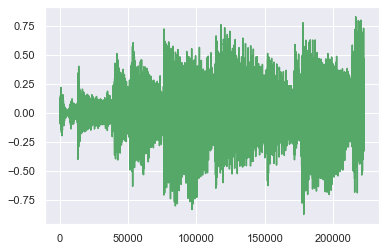

In [60]:
# Download the wave file `https://staffwww.dcs.shef.ac.uk/people/S.Goetze/sound/music_44k.wav`

# your code here 
import soundfile as sf
s,sr=sf.read('music_44k.wav')
plt.plot(s, 'g')
# load it into a variable.
# mus_44k, fs44 = ....  # complete code here

<div style="border: 2px solid #999; padding: 10px; background: #eee;">
    
**Task 9:**
    
Change the sampling frequency from $44$ kHz (which is the original sampling frequency of the loaded WAVE file) to $8$ kHz. Then change the sampling frequency back to $44$ kHz.
    
Plot both signal as a spectrogram. This can be done using the command `resample` from the `librosa` library.
    
</div>

You should see in the plotted spectrograms that information above $4$ kHz originally contained in the signal is now lost.

In [64]:
!pip librosa
import librosa         # we will use librosa here for resampling

mus_8k = librosa.resample(mus_44k, fs44, 8000); # resample to 8 kHz
# .....     # resample back to 44.1 kHz

# compare in terms of spectrograms
plt.subplot(1,2,1)
plt.specgram(mus_44k, Fs=fs44);
plt.subplot(1,2,2)
plt.specgram(mus_44k_2, Fs=fs44);

ERROR: unknown command "librosa"



ModuleNotFoundError: No module named 'librosa'